# A Blood Brain Pharmacokinetic Model

In [1]:
# konstanta yang diberikan
k21 = 0.29;
k12 = 0.31;
k   = 0.16;
v1  = 6;
v2  = 0.25;
tb  = 1;

dt  = 0.001;
R   = 10.78; # rate of uptake

A = [-(k+k21)   , k12*v2/v1;
      k21*v1/v2 ,     -k12];
F = [R/v1; 0];

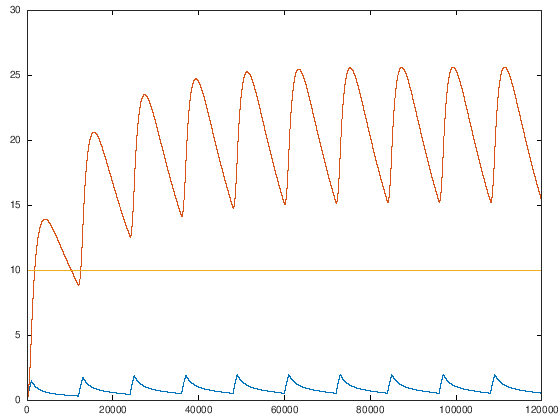

In [2]:
# preallocating for faster calculation
res = zeros(10*12*tb/dt,2);

v = [0; 0]; # besar konsentrasi di darah, dan di otak

idx = 1;
for konsumsi_ke=1:10
    t = dt;
    D = R; # obat masih ada di lambung
    while t<=tb 
        v = v + dt*(A*v+F);
        res(idx,:) = v.';
        t+=dt; idx+=1;
    end
    
    D=0; # obat sudah larut ke dalam darah
    # jalankan simulasi konsentrasi obat untuk 11 jam kedepan (tb==1 btw)
    # as matter of convience, pemilihan waktu yang mungkin dalam simulasi ini
    #    6 jam sekali (4x sehari) batas maksimum
    #    8 jam sekali (3x sehari) ... btw, gatau apakah ini ide bagus
    #   12 jam sekali (2x sehari)
    #   24 jam sekali (1x sehari) batas minimum
    #
    # dalam kasus ini, urang pilih obat perlu diminum 12 jam sekali    
    while t<=12*tb
        v = v + dt*(A*v);
        res(idx,:) = v.';
        t+=dt; idx+=1;
    end
end

res(:,3) = 10; # batas minimum  efektif
res(:,4) = 30; # batas maksimum efektif

plot(res);

In [3]:
tb  = 8;
R   = 2.45;  

A = [-(k+k21)   , k12*v2/v1;
      k21*v1/v2 ,     -k12];
F = [R/v1; 0];

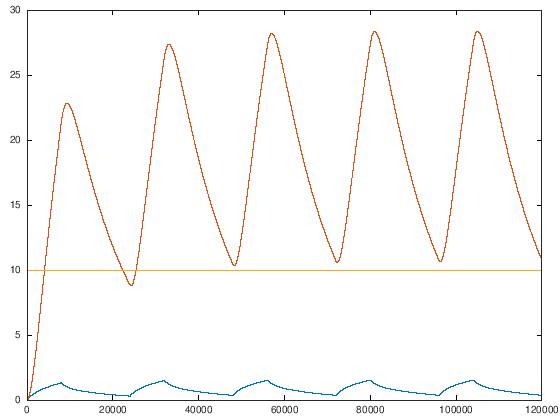

In [4]:
# preallocating for faster calculation
res = zeros(5*3*tb/dt,2);

v = [0; 0]; # besar konsentrasi di darah, dan di otak

idx = 1;
for konsumsi_ke=1:5
    t = dt;
    D = R; # obat masih ada di lambung
    while t<=tb 
        v = v + dt*(A*v+F);
        res(idx,:) = v.';
        t+=dt; idx+=1;
    end
    
    D=0; # obat sudah larut ke dalam darah
    while t<=3*tb
        v = v + dt*(A*v);
        res(idx,:) = v.';
        t+=dt; idx+=1;
    end
end

res(:,3) = 10; # batas minimum  efektif
res(:,4) = 30; # batas maksimum efektif

plot(res);

# Earthquakes and Tall Building

In [5]:
# efficiently create band matrix
n = 5;
e = ones(n, 1);
K = spdiags([-e, 2*e, -e], -1:1, n, n);
K = full(K)

K =

   2  -1   0   0   0
  -1   2  -1   0   0
   0  -1   2  -1   0
   0   0  -1   2  -1
   0   0   0  -1   2



wait, what the furr with (d)? demonstrate numerically? luckily, there is an interesting paper about finding eigenvalues of [banded matrix here](https://en.wikipedia.org/wiki/Tridiagonal_matrix)